# Fish market

### source link : [kaggle]

[kaggle]: kaggle.com/aungpyaeap/fish-market

In [509]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

## Dataset

In [510]:
data = pd.read_csv('../../../Fish.csv')
data.describe()
# Lenght1 = vertical lenght in cm
# Lenght2 = diagonal lenght in cm
# Lenght3 = cross lenght in cm

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [511]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [512]:
data.groupby('Species').count()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,35,35,35,35,35,35
Parkki,11,11,11,11,11,11
Perch,56,56,56,56,56,56
Pike,17,17,17,17,17,17
Roach,20,20,20,20,20,20
Smelt,14,14,14,14,14,14
Whitefish,6,6,6,6,6,6


## Perch analysis and prediction

In [513]:
perch_data = data.loc[data['Species'] == 'Perch']
perch_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


### Prediction

#### training dataset

In [514]:
training_data = perch_data.drop(columns=['Species', 'Weight'])
training_data.head()

,Length1,Length2,Length3,Height,Width
72,7.5,8.4,8.8,2.1120,1.4080
73,12.5,13.7,14.7,3.5280,1.9992
74,13.8,15.0,16.0,3.8240,2.4320
75,15.0,16.2,17.2,4.5924,2.6316
76,15.7,17.4,18.5,4.5880,2.9415


#### target dataset

In [515]:
target_data = perch_data['Weight']
target_data.head()

72     5.9
73    32.0
74    40.0
75    51.5
76    70.0
Name: Weight, dtype: float64

#### Datasets plotting

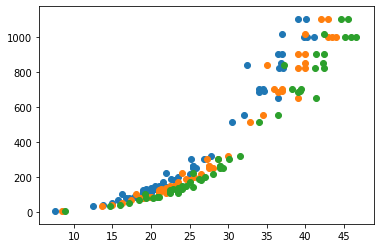

In [516]:
plt.scatter(training_data['Length1'], target_data)
plt.scatter(training_data['Length2'], target_data)
plt.scatter(training_data['Length3'], target_data)

plt.show()

#### Model

In [517]:
regr = linear_model.LinearRegression()
regr.fit(training_data.values, target_data.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [518]:
prediction = regr.predict(training_data)
prediction.shape

(56,)

#### Model accuracy

In [529]:
# The mean squared error
print('Mean squared error : ', mean_squared_error(target_data.values, prediction))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination : ',r2_score(target_data.values, prediction))

Mean squared error :  0.050314465408805034
Coefficient of determination :  0.9876682049094505


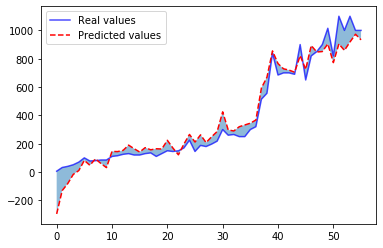

In [520]:
x = np.arange(training_data['Length1'].values.size)

plt.plot(x, target_data, color='blue', alpha=0.7, label='Real values')
plt.plot(x, prediction, color='red', linestyle="--", label='Predicted values')
plt.fill_between(x, target_data, prediction, alpha=0.5)
plt.legend()
plt.show()

## Fish species prediction

### Species definition

In [521]:
species = data['Species'].unique().tolist()
species_int = dict(zip(species, range(len(species))))
species_int

{'Bream': 0,
 'Roach': 1,
 'Whitefish': 2,
 'Parkki': 3,
 'Perch': 4,
 'Pike': 5,
 'Smelt': 6}

### Prediction

#### training dataset

In [522]:
training_data = data.drop(columns=['Species'])
training_data.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


#### target dataset

In [523]:
target_data = data['Species']
target_data = target_data.replace(to_replace=list(species_int.keys()), value=list(species_int.values()))
target_data.unique()

array([0, 1, 2, 3, 4, 5, 6])

#### Model

In [524]:
regr = linear_model.LogisticRegression(solver='newton-cg', multi_class='multinomial')
regr.fit(training_data.values, target_data.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [525]:
prediction = regr.predict(training_data)
prediction.shape

(159,)

#### Model accuracy

In [528]:
# The mean squared error
print('Mean squared error : ', mean_squared_error(target_data.values, prediction))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination : ',r2_score(target_data.values, prediction))

Mean squared error :  0.050314465408805034
Coefficient of determination :  0.9876682049094505


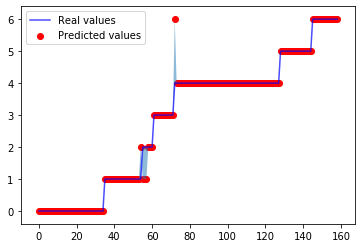

In [527]:
x = np.arange(training_data['Length1'].values.size)

plt.plot(x, target_data, color='blue', alpha=0.7, label='Real values')
plt.scatter(x, prediction, color='red',  label='Predicted values')
plt.fill_between(x, target_data, prediction, alpha=0.5)
plt.legend()
plt.show()